All of the data and metadata for the Allen Mouse Brain Atlas is now stored in a public bucket in Amazon's S3 data storage service as described here

https://console.aws.amazon.com/s3/buckets/allen-mouse-brain-atlas

Link name: arn:aws:s3:::allen-mouse-brain-atlas

The utilities demonstrated here access that bucket through AWS's `boto3` API.

In [1]:
from open_dataset_tools.aws_utils import get_public_boto3_client

s3_client = get_public_boto3_client()

# If you have already set up and would like to use AWS credentials you could do:
# import boto3
# s3_client = boto3.client('s3')

Now that we have a `boto3 s3_client`, we will download the metadata for the Allen Mouse Brain Atlas. First, let's import the standard Python pathlib Path object as well as the `open_dataset_tools` module containing the utilities for accessing the atlas.

In [2]:
import json
from pathlib import Path
import open_dataset_tools.aba_mouse_utils as mouse_utils

## Downloading data locally

Now let's download the metadata for the entire atlas. The `get_atlas_metadata` function below downloads the metadata file to a user specified directory. In addition to downloading the metadata, the `get_atlas_metadata` function will also load it into memory, giving you access to a list of dicts, each of which represents one "section data set" in the Allen Mouse Brain Atlas.

In [3]:
# Change this to a location on your computer with ample space
download_directory = Path("/local1/allen_mouse_brain_atlas_data")

atlas_metadata = mouse_utils.get_atlas_metadata(s3_client=s3_client, download_directory=download_directory)

Consider just the first two elements in `atlas_metadata`

In [4]:
atlas_metadata[:2]

[{'id': 3,
  'genes': [{'acronym': 'Snap47', 'entrez_id': 67826}],
  'probes': [{'name': 'RP_040324_01_E07',
    'orientation': {'name': 'Antisense'}}],
  'plane_of_section': {'name': 'coronal'},
  'section_metadata': 'section_data_set_3/section_data_set.json'},
 {'id': 5,
  'genes': [{'acronym': 'Nvl', 'entrez_id': 67459}],
  'probes': [{'name': 'RP_Baylor_253948',
    'orientation': {'name': 'Antisense'}}],
  'plane_of_section': {'name': 'coronal'},
  'section_metadata': 'section_data_set_5/section_data_set.json'}]

In [5]:
section_id_list = []
for obj in atlas_metadata:
    section_id_list.append(obj['id'])
section_id_list.sort()

In [6]:
73817439 in section_id_list

True

Here we can see the very high level metadata about each of the section data sets in the atlas. To download the detailed metadata about one of these sets, we use the class `SectionDataSet`, which we instantiate with the `id` of the section data set found in the atlas metadata above.

In [7]:
section_data = mouse_utils.SectionDataSet(73817439, download_directory=download_directory, s3_client=s3_client)

`section_data.metadata` is now a dict containing all of the metadata about the section data set.

In [8]:
key_list = list(section_data.metadata.keys())
key_list.sort()
print(key_list)

['genes', 'id', 'plane_of_section', 'probes', 'section_thickness', 'specimen', 'treatments']


In [9]:
print(json.dumps(section_data.metadata, indent=2, sort_keys=True))

{
  "genes": [
    {
      "acronym": "Syt9",
      "entrez_id": 60510
    }
  ],
  "id": 73817439,
  "plane_of_section": {
    "name": "coronal"
  },
  "probes": [
    {
      "forward_primer_sequence": {
        "id": 477481,
        "sequence_data": "CCAGAAAGTGTTCCAGTTTTCC",
        "sequence_length": 22
      },
      "gi": 31543798,
      "name": "RP_051101_01_B03",
      "ncbi_accession_number": "NM_021889.2",
      "orientation": {
        "name": "Antisense"
      },
      "predicted_sequence": {
        "id": 477480,
        "sequence_data": "CCAGAAAGTGTTCCAGTTTTCCAAGTAATGGCCCAAGAAAATACTAGGCTAAGCCAGCCTGGAAAAAGTCTCATGCAAGGCAGGTCAGTTCATAGCAAACTCACTGTCCCTTCCCATGCACATGGCAGAGTCCCACTTAGCCATGGTCATTCTTCACAGAACCCAGGTTCTGGGATTCTAAAACATTATTTCCAAGTAGCCTCTTCCTTTCCAGCAGTGATATTACTAGAGTGAAACGTGCCATCTTTGTTAGGGACACTTGCCTCCCAGTGGAATATGCATCCAGGAATAATCTTTCCTGGACACAGAAGTGTGTGTTATGAGATAAGATCACTGAGAGATGACACTGGAAAAAGGCACAGCTTTTGGGCTTTCTTGACACAGCTGCCTTCTGGCTGTTTCCATATGCAACAGCCCAGGGTATAGACTTGGGCAGCCACAG

Metadata about the images that make up this section dataset can be accessed according to either their `sub_image_id` or their `tissue_index`. Below, we show lists of valid values for these parameters.

In [10]:
print(section_data.tissue_indices)
print('')
print(section_data.sub_image_ids)

[0, 4, 12, 16, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 288, 296, 300, 304, 308, 312, 316, 320, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400, 404, 408, 412, 416, 420, 424, 428, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 476]

[73816197, 73816201, 73816203, 73816207, 73816209, 73816211, 73816213, 73816217, 73816219, 73816221, 73816223, 73816227, 73816229, 73816231, 73816233, 73816237, 73816239, 73816241, 73816243, 73816247, 73816251, 73816253, 73816257, 73816259, 73816261, 73816263, 73816269, 73816271, 73816273, 73816277, 73816279, 73816281, 73816283, 73816287, 73816289, 73816291, 73816293, 73816297, 73816299, 73816301, 73816303, 73816307, 73816309, 73816311, 73816313, 73816317, 7381631

To get the metadata associated with one of these images, use

In [11]:
sub_img_id = 73816877
image_metadata = section_data.image_metadata_from_sub_image(sub_img_id)

In [12]:
print(image_metadata['section_number'])

252


In [13]:
alt_metadata = section_data.image_metadata_from_tissue_index(252)
assert alt_metadata == image_metadata

In [14]:
print(image_metadata.keys())

dict_keys(['bits_per_component', 'id', 'resolution', 'section_number', 'downsampling', 'image_file_name'])


All of the images in the atlas exist at multiple resolutions. Each resolution is identified by a downsampling tier. `downsampling == 0` corresponds to the full resolution image. Each larger downsampling tier corresponds to a factor of 2 reduction in resolution in both the x and y direction, so `downsampling == 1` is a factor of 4 smaller than `downsampling == 0`; `downsampling == 2` is a factor of 16 smaller than `downsampling == 0`; etc.

To see what downsampling tiers are available for each image, use

In [15]:
downsampling_tiers = list(image_metadata['downsampling'].keys())
downsampling_tiers.sort()
print(downsampling_tiers)

['downsample_0', 'downsample_1', 'downsample_2', 'downsample_3', 'downsample_4', 'downsample_5', 'downsample_6']


**Note:** in some rare cases, the full-resolution image file became corrupted during processing and was lost. These will correspond to images that have a valid `downsample_1` but no `downsample_0`. If you ever ask for a downsampling index that does not exist, the code should fail gracefully and issue a warning.

The methods `SectionDataSet.download_image_from_tissue_index` and `SectionDataSet.download_image_from_sub_image` allow you to download an image as a TIFF file, specifying it by either its tissue index or its sub-image ID and its downsampling index.

Let's download the `downsampling == 3` copy of the image with `tissue_index == 58`. We must specify a local filepath in which to write the image.

These methods return `True` if the image was downloaded; `False` otherwise.

In [16]:
# Change this to a location where you would like to save files
local_filepath = Path('/tmp/example_aba_image.tiff')

# the clobber kwarg below tells the method to download the image, even if local_filepath already exists,
# overwriting the existing file. clobber defaults to False, in which case, the file would not be
# downloaded and a warning would be issued if local_filepath already exists.
section_data.download_image_from_sub_image(sub_img_id, 4, local_filepath, clobber=True)

True

Let's visualize the image with matplotlib.

In [17]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import PIL.Image

In [18]:
def show_tiff(file_name):
    """
    file_name is the name of a locally stored TIFF to display
    """
    plt.figure(figsize=(15,15))
    img = PIL.Image.open(file_name)
    plt.imshow(img)

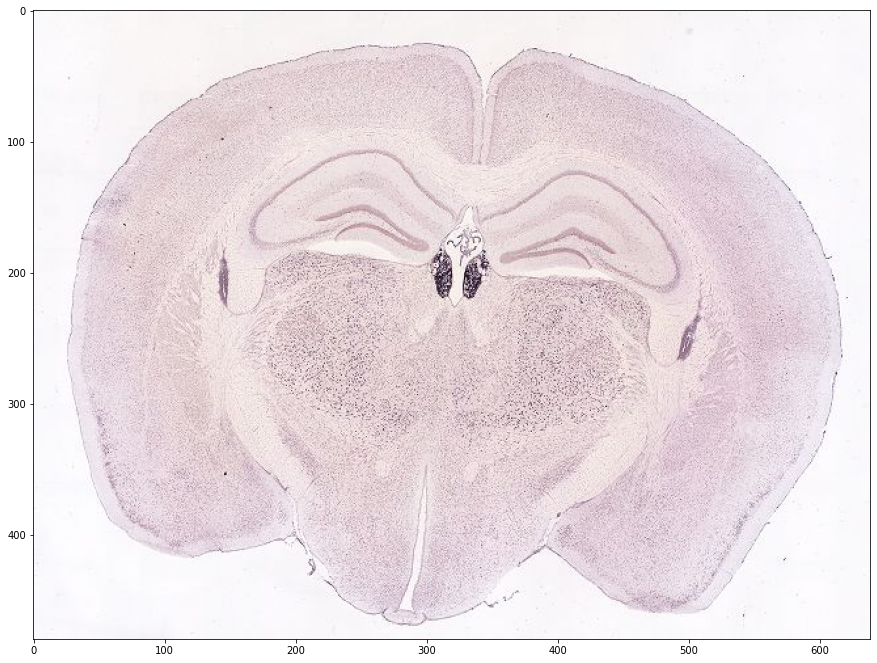

In [19]:
show_tiff(local_filepath)

Now, a sagittal example

CPU times: user 186 ms, sys: 82.2 ms, total: 268 ms
Wall time: 897 ms


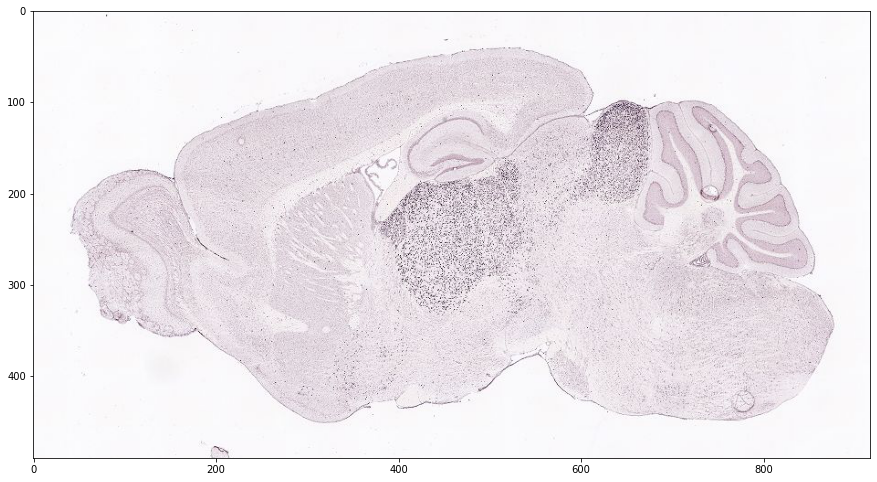

In [20]:
%%time

sagittal_data_set = mouse_utils.SectionDataSet(100055049, download_directory=download_directory, s3_client=s3_client)
ii = 101082398
sagittal_metadata = sagittal_data_set.image_metadata_from_sub_image(ii)

# Change this to a location where you would like to save files
sagittal_save_path = Path('/tmp/sagittal_eg.tiff')
sagittal_data_set.download_image_from_sub_image(ii, 4, sagittal_save_path, clobber=True)
show_tiff(sagittal_save_path)


## Access to web resources

All of the data provided by this tool is still available through the Allen Institute's `brain-map.org` web tool. The `SectionDataSet` class provides methods to get URLs, both to the `brain-map.org` representation of the whole section data set and to high quality visualizations of individual sub images.

To get the URL corresponding to the entire section data set, use

In [21]:
sagittal_data_set.section_url()

'http://mouse.brain-map.org/experiment/show/100055049'

In [22]:
# define a function to display hyperlinks in this notebook

import IPython.core.display as ipython_core_display

def display_hyperlink(url_eg):
    html_str = """<a href="{url}">{url}</a>""".format(url=url_eg)
    h = ipython_core_display.HTML(html_str)
    ipython_core_display.display(h)
    return None

In [23]:
display_hyperlink(sagittal_data_set.section_url())

To get the URL for individual sub-images (using either `sub_image_id` or `tissue_index` to specify the sub-image) use:

In [24]:
display_hyperlink(sagittal_data_set.sub_image_url(101082398))

In [25]:
display_hyperlink(sagittal_data_set.tissue_index_url(115))

## Aside: images with multiple tissue sections

Let's back up and take a closer look at the metadata associated with one of the images above.

In [26]:
print(json.dumps(sagittal_metadata, indent=2, sort_keys=True))

{
  "bits_per_component": 8,
  "downsampling": {
    "downsample_0": {
      "height": 7840,
      "image_file_height": 38224,
      "image_file_width": 19168,
      "width": 14672,
      "x": 688,
      "y": 20368
    },
    "downsample_1": {
      "height": 3920,
      "image_file_height": 19112,
      "image_file_width": 9584,
      "width": 7336,
      "x": 344,
      "y": 10184
    },
    "downsample_2": {
      "height": 1960,
      "image_file_height": 9556,
      "image_file_width": 4792,
      "width": 3668,
      "x": 172,
      "y": 5092
    },
    "downsample_3": {
      "height": 980,
      "image_file_height": 4778,
      "image_file_width": 2396,
      "width": 1834,
      "x": 86,
      "y": 2546
    },
    "downsample_4": {
      "height": 490,
      "image_file_height": 2389,
      "image_file_width": 1198,
      "width": 917,
      "x": 43,
      "y": 1273
    },
    "downsample_5": {
      "height": 245,
      "image_file_height": 1194,
      "image_file_width": 599

Each downsampling tier lists a `height`, a `width`, an `x` coordinate, and a `y` coordinate. `x` and `y` denote the upper left corner of the image. Naively, `height` and `width` denote the height and width of the TIFF file itself (that is why, in this case, they are identical to `image_file_height` and `image_file_width`). In some cases, however, one TIFF file can contain multiple images of tissues, in which case these parameters will denote the origin and bounds of individual sub images. For example:

In [27]:
dataset = mouse_utils.SectionDataSet(100055044, download_directory=download_directory, s3_client=s3_client)
subimage_5 = dataset.image_metadata_from_tissue_index(5)
subimage_13 = dataset.image_metadata_from_tissue_index(13)
assert subimage_5['image_file_name'] == subimage_13['image_file_name']

In [28]:
print(json.dumps(subimage_5, indent=2, sort_keys=True))

{
  "bits_per_component": 8,
  "downsampling": {
    "downsample_0": {
      "height": 6384,
      "image_file_height": 38208,
      "image_file_width": 19136,
      "width": 9072,
      "x": 5120,
      "y": 30368
    },
    "downsample_1": {
      "height": 3192,
      "image_file_height": 19104,
      "image_file_width": 9568,
      "width": 4536,
      "x": 2560,
      "y": 15184
    },
    "downsample_2": {
      "height": 1596,
      "image_file_height": 9552,
      "image_file_width": 4784,
      "width": 2268,
      "x": 1280,
      "y": 7592
    },
    "downsample_3": {
      "height": 798,
      "image_file_height": 4776,
      "image_file_width": 2392,
      "width": 1134,
      "x": 640,
      "y": 3796
    },
    "downsample_4": {
      "height": 399,
      "image_file_height": 2388,
      "image_file_width": 1196,
      "width": 567,
      "x": 320,
      "y": 1898
    },
    "downsample_5": {
      "height": 199,
      "image_file_height": 1194,
      "image_file_width":

In [29]:
print(json.dumps(subimage_13, indent=2, sort_keys=True))

{
  "bits_per_component": 8,
  "downsampling": {
    "downsample_0": {
      "height": 7232,
      "image_file_height": 38208,
      "image_file_width": 19136,
      "width": 9504,
      "x": 4448,
      "y": 20560
    },
    "downsample_1": {
      "height": 3616,
      "image_file_height": 19104,
      "image_file_width": 9568,
      "width": 4752,
      "x": 2224,
      "y": 10280
    },
    "downsample_2": {
      "height": 1808,
      "image_file_height": 9552,
      "image_file_width": 4784,
      "width": 2376,
      "x": 1112,
      "y": 5140
    },
    "downsample_3": {
      "height": 904,
      "image_file_height": 4776,
      "image_file_width": 2392,
      "width": 1188,
      "x": 556,
      "y": 2570
    },
    "downsample_4": {
      "height": 452,
      "image_file_height": 2388,
      "image_file_width": 1196,
      "width": 594,
      "x": 278,
      "y": 1285
    },
    "downsample_5": {
      "height": 226,
      "image_file_height": 1194,
      "image_file_width":

Note that the two sub-images share the same `image_file_name`, indicating that they are subsections of the same TIFF file. Similarly, for each downsampling tier, they share the same `image_file_height` and `image_file_width`, representing the total number of pixels in the TIFF file, but they have different `height`, `width`, `x`, and `y`, representing the different bounding boxes of the different sub-images.

In [30]:
for ds in subimage_5['downsampling'].keys():
    assert subimage_5['downsampling'][ds]['image_file_height'] == subimage_13['downsampling'][ds]['image_file_height']
    assert subimage_5['downsampling'][ds]['image_file_width'] == subimage_13['downsampling'][ds]['image_file_width']

The utilities to download a TIFF image are aware of the possibility that a single file contains multiple brain section images. They automatically crop the TIFF in AWS to contain only the selected brain slice image. The TIFF that is actually saved on your local machine represents only the region of the image described by `x`, `y`, `width` and `height`.

In [31]:
# Change this to a location where you would like to save files
local_filepath = Path('/tmp/example_compound_image.tiff')
dataset.download_image_from_tissue_index(13, 4, local_filepath, clobber=True)

True

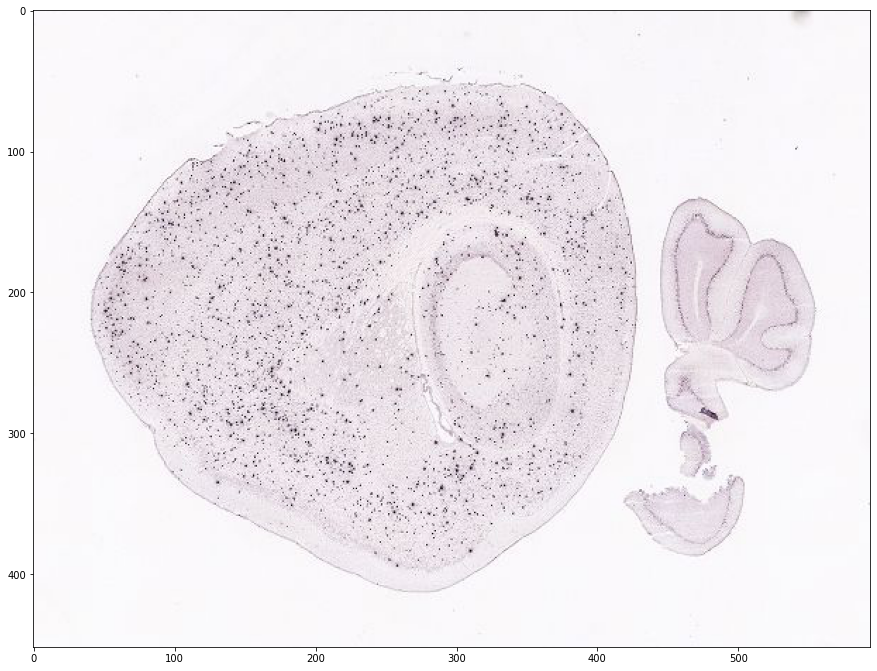

In [32]:
show_tiff(local_filepath)